# Project 2: Inferencia a Trest Smrti

Vitajte vo vašom prvom projekte! Dnes spolu zistíme či existuje medzi trestom smrti a počtom vrážd nejaký vzťah.   Pred koncom tohto projektu by si mal vedieť:

1. Odtestovať či boli tvoje dáta náhodne vybrané z distribúcie.
2. Analyze a natural experiment
3. Implement and interpret a sign test
4. Create a function to run a general hypothesis test
5. Analyze visualizations and draw conclusions from them

### Logistics

**Partnery.** Môžete pracovať spolu alebo v pároch.

**Rules.** Don't share your code with anybody but your partner. You are welcome to discuss questions with other students, but don't share the answers. The experience of solving the problems in this project will prepare you for exams (and life). If someone asks you for the answer, resist! Instead, you can demonstrate how you would solve a similar problem.

**Support.** You are not alone! Ask questons, we are here to help you. Don't be stuck.

**Advice.** Develop your answers incrementally. To perform a complicated table manipulation, break it up into steps. You can add any additional names or functions you want to the provided cells. Use the documentation provided and feel free to use any libraries you're more familiar with!

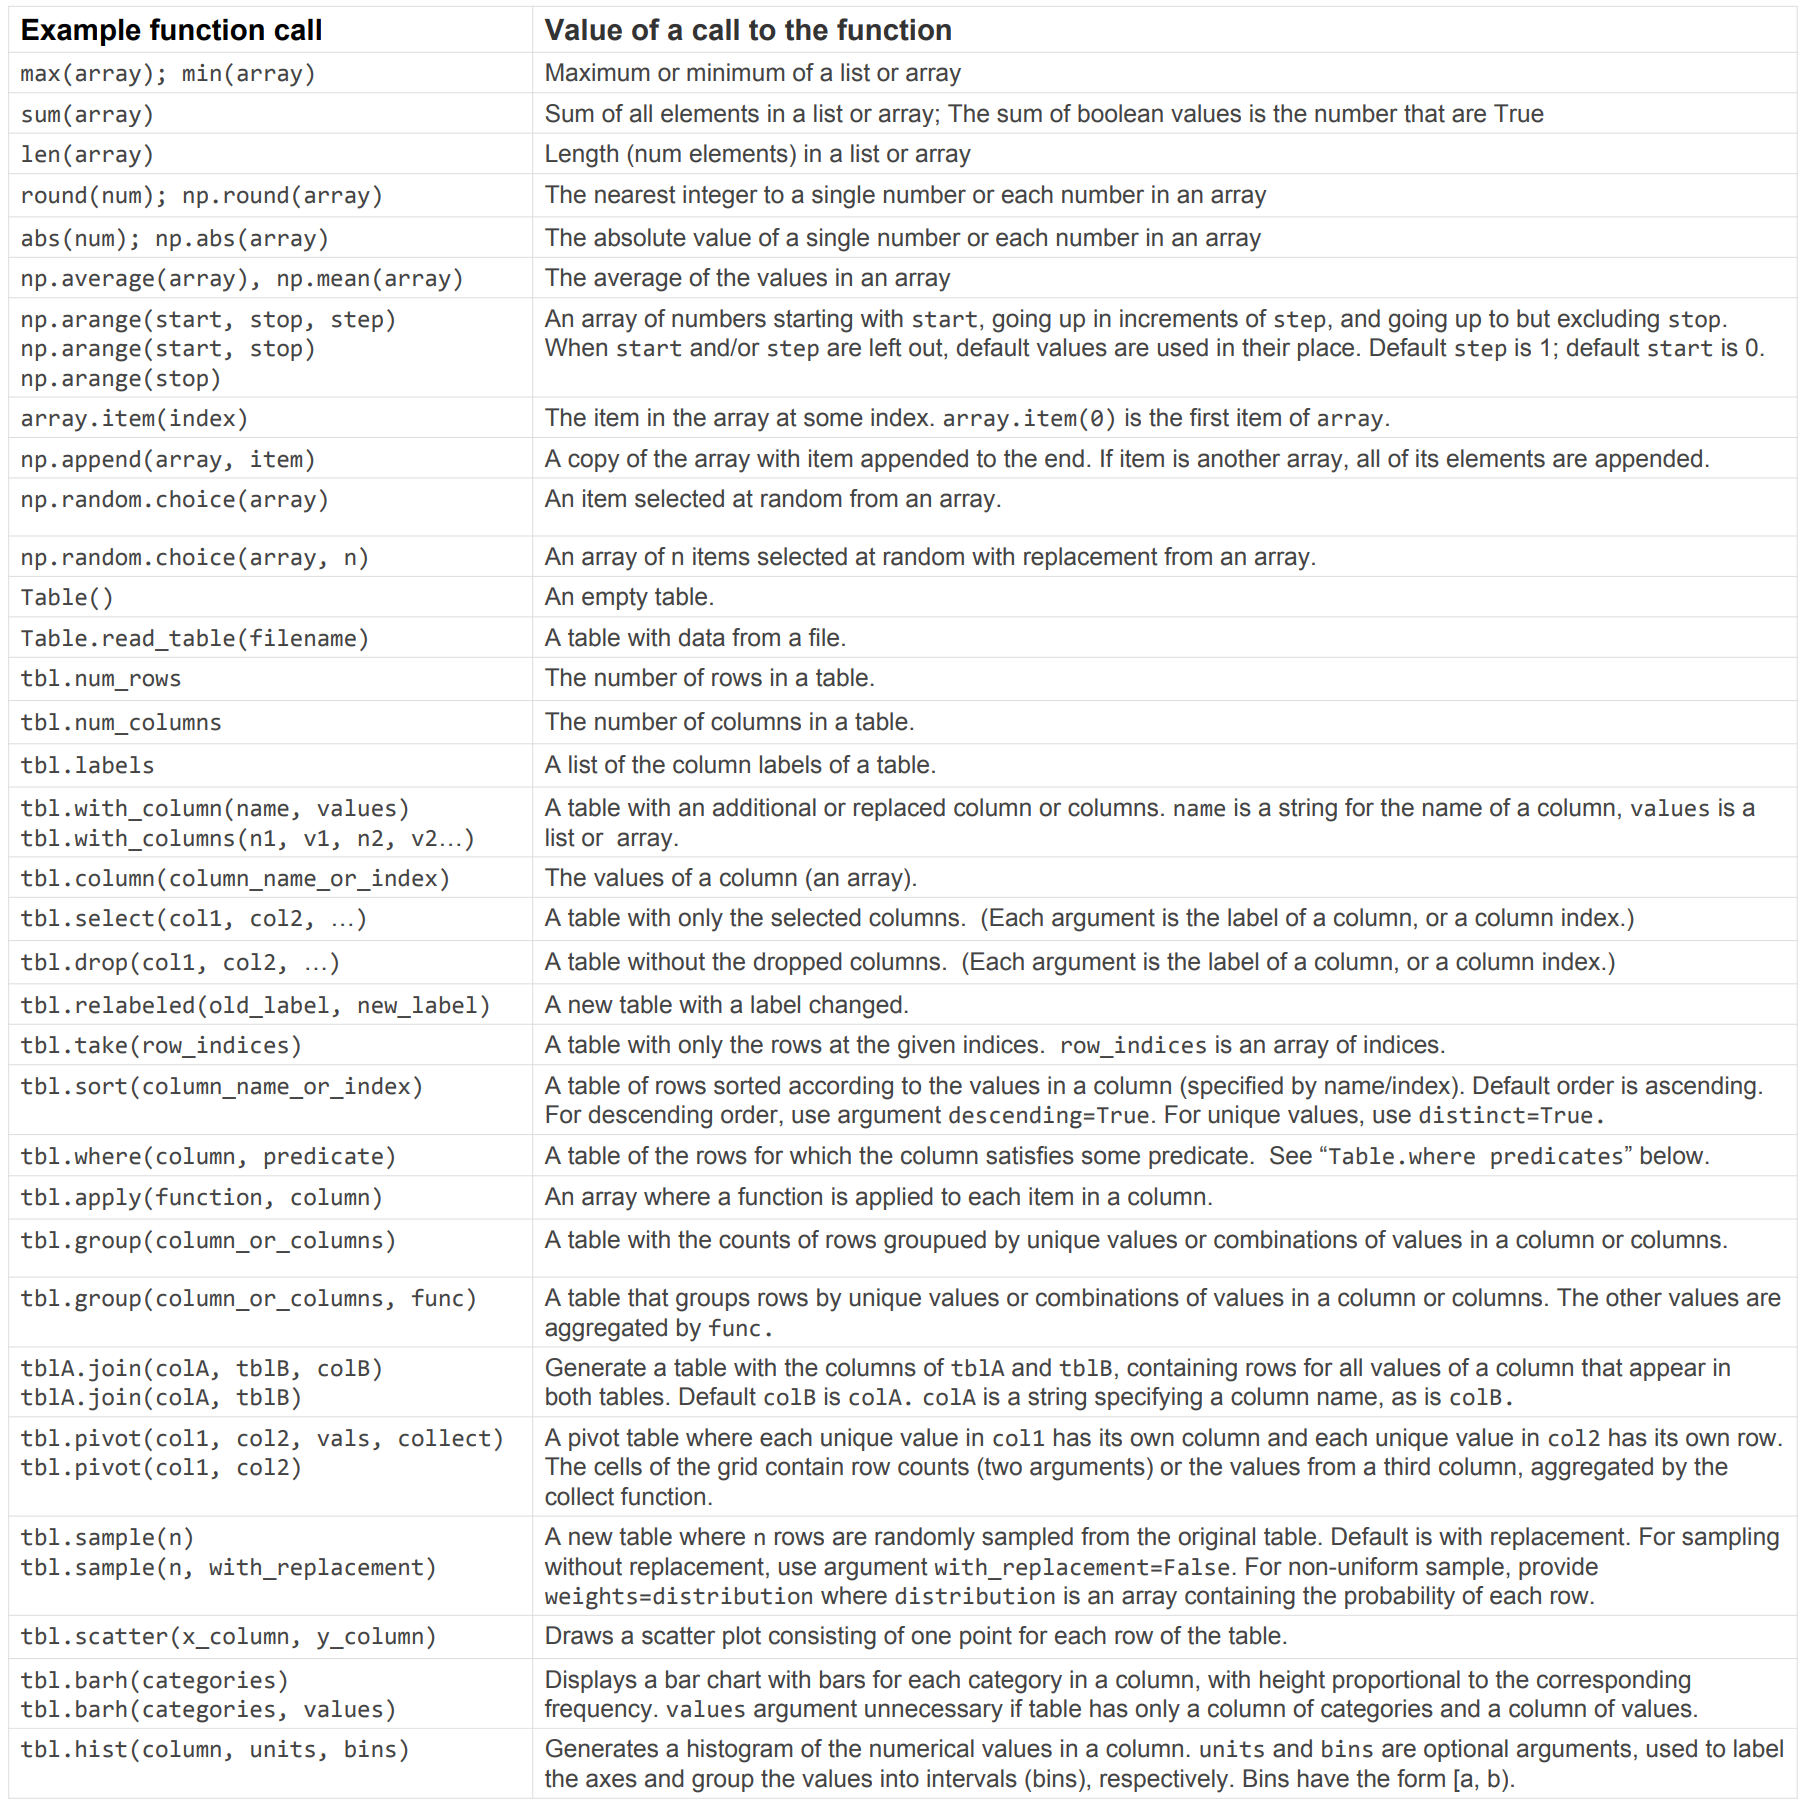

To get started, load `datascience`, `numpy`, `plots`, and `ok`.

In [24]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

from client.api.notebook import Notebook
ok = Notebook('project.ok')


Assignment: project
OK, version v1.13.11



## Overview

Punishment for crime has many [philosophical justifications](http://plato.stanford.edu/entries/punishment/#ThePun).  An important one is that fear of punishment may *deter* people from committing crimes.

In the United States, some jurisdictions execute some people who are convicted of particularly serious crimes, such as murder.  This punishment is called the *death penalty* or *capital punishment*.  The death penalty is controversial, and deterrence has been one focal point of the debate.  There are other reasons to support or oppose the death penalty, but in this project we'll focus on deterrence.

The key question about deterrence is:

> Through our exploration, does instituting a death penalty for murder actually reduce the number of murders?

You might have a strong intuition in one direction, but the evidence turns out to be surprisingly complex.  Different sides have variously argued that the death penalty has no deterrent effect and that each execution prevents 8 murders, all using statistical arguments!  We'll try to come to our own conclusion.

#### The data

The main data source for this project comes from a [paper](http://cjlf.org/deathpenalty/DezRubShepDeterFinal.pdf) by three researchers, Dezhbakhsh, Rubin, and Shepherd.  The dataset contains rates of various violent crimes for every year 1960-2003 (44 years) in every US state.  The researchers compiled the data from the FBI's Uniform Crime Reports.

Since crimes are committed by people, not states, we need to account for the number of people in each state when we're looking at state-level data.  Murder rates are calculated as follows:

$$\text{murder rate for state X in year Y} = \frac{\text{number of murders in state X in year Y}}{\text{population in state X in year Y}}*100000$$

(Murder is rare, so we multiply by 100,000 just to avoid dealing with tiny numbers.)

In [29]:
murder_rates = Table.read_table('crime_rates.csv').select('State', 'Year', 'Population', 'Murder Rate')
murder_rates.set_format("Population", NumberFormatter)

State,Year,Population,Murder Rate
Alaska,1960,"226,167",10.2
Alaska,1961,"234,000",11.5
Alaska,1962,"246,000",4.5
Alaska,1963,"248,000",6.5
Alaska,1964,"250,000",10.4
Alaska,1965,"253,000",6.3
Alaska,1966,"272,000",12.9
Alaska,1967,"272,000",9.6
Alaska,1968,"277,000",10.5
Alaska,1969,"282,000",10.6


## 1. Murder rates

So far, this looks like a dataset that lends itself to an observational study.  In fact, the murder rates dataset isn't even enough to demonstrate an *association* between the existence of the death penalty in a state in a year and the murder rate in that state and year!

**Question 1.1.** What additional information will we need before we can check for that association? Assign `extra_info` to a Python list (i.e. [#] or [#, #, ...]) containing the number(s) for all of the additional facts below that we *require* in order to check for association.

1) What year(s) the death penalty was introduced in each state (if any).

2) Day to day data about when murders occurred.

3) What year(s) the death penalty was abolished in each state (if any).

4) Rates of other crimes in each state.

In [34]:
extra_info = [...]

In [33]:
_ = ok.grade("q1_1")


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



Murder rates vary over time, and different states exhibit different trends. The rates in some states change dramatically from year to year, while others are quite stable. Let's plot a couple, just to see the variety.

**Question 1.2.** Draw a line plot with years on the horizontal axis and murder rates on the 
vertical axis. Include two lines: one for Alaska murder rates and one for Minnesota murder rates. Create this plot using a single call, `ak_mn.plot('Year')`.

*Hint*: To create two lines, you will need create the table `ak_mn` with two columns of murder rates, in addition to a column of years. This table will have the following structure:

| Year | Murder rate in Alaska | Murder rate in Minnesota |
|------|-----------------------|--------------------------|
| 1960 | 10.2                  | 1.2                      |
| 1961 | 11.5                  | 1                        |
| 1962 | 4.5                   | 0.9                      |

<center>... (41 rows omitted)</center>

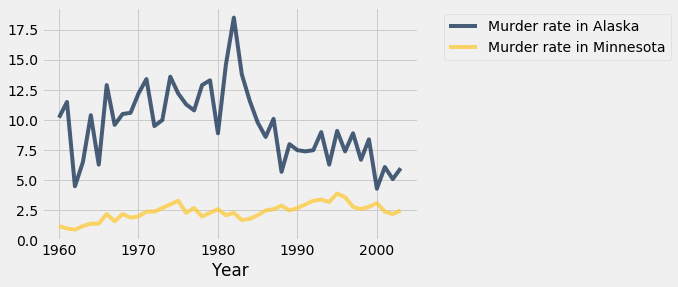

In [35]:
# The next lines are provided for you.  They create a table
# containing only the Alaska information and one containing
# only the Minnesota information.
Alaska = murder_rates.where('State', 'Alaska').drop('State', 'Population').relabeled(1, 'Murder rate in Alaska')
Minnesota = murder_rates.where('State', 'Minnesota').drop('State', 'Population').relabeled(1, 'Murder rate in Minnesota')

# Fill in this line to make a table like the one pictured above.
ak_mn = ...
ak_mn.plot('Year')

In [36]:
_ = ok.grade("q1_2")


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



Now what about the murder rates of other states? Say, for example, California and New York? Fill in the cell below to plot the murder rates of different pairs of states. **Note:** this should use similar code to question 1.2, with only the variable names changed. The cell below will not be graded, but it creates a cool interactive module!

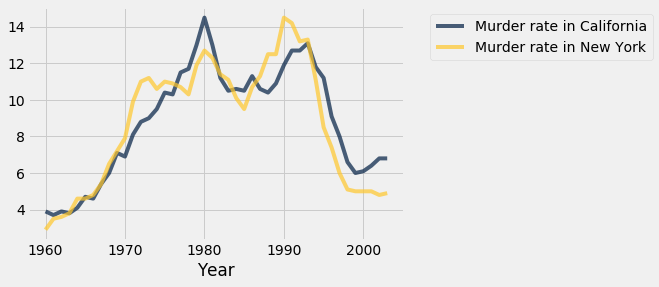

In [37]:
# Compare the murder rates of any two states by filling in the blanks below

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def state(state1, state2):
    state1_table = murder_rates.where('State', state1).drop('State', 'Population').relabeled(1, 'Murder rate in {}'.format(state1))
    state2_table = murder_rates.where('State', state2).drop('State', 'Population').relabeled(1, 'Murder rate in {}'.format(state2))
    s1_s2 = state1_table.join('Year', state2_table)
    s1_s2.plot('Year')
    plots.show()

states_array = murder_rates.group('State').column('State')

_ = interact(state,
             state1=widgets.Dropdown(options=list(states_array),value='California'),
             state2=widgets.Dropdown(options=list(states_array),value='New York')
            )

# 3. The death penalty

Some US states have the death penalty, and others don't, and laws have changed over time. In addition to changes in murder rates, we will also consider whether the death penalty was in force in each state and each year.

Using this information, we would like to investigate how the death penalty affects the murder rate of a state.

**Question 3.1.** Describe this investigation in terms of an experiment. What population are we studying? What is the control group? What is the treatment group? What outcome are we measuring? Be precise!

*Write your answers below.*

- Population: the 50 US states
- Control Group: states where the death penalty was introduced
- Treatment Group: the states without a death penalty being introduced
- Outcome: changes in murder rate in the year, when DP was introduced

**Question 3.2.** We want to know whether the death penalty *causes* a change in the murder rate.  Why is it not sufficient to compare murder rates in places and times when the death penalty was in force with places and times when it wasn't?

*Each state has very different population which has a history of being either more or less violent.There are many confounding factors which are impossible to isolate and therefore it would not be impossible to only compare the influence of death penalty on murder rates.*

### A Natural Experiment

In order to attempt to investigate the causal relationship between the death penalty and murder rates, we're going to take advantage of a *natural experiment*.  A natural experiment happens when something other than experimental design applies a treatment to one group and not to another (control) group, and we have some hope that the treatment and control groups don't have any other systematic differences.

Our natural experiment is this: in 1972, a Supreme Court decision called *Furman v. Georgia* banned the death penalty throughout the US.  Suddenly, many states went from having the death penalty to not having the death penalty.

As a first step, let's see how murder rates changed before and after the court decision.  We'll define the test as follows:

> **Population:** All the states that had the death penalty before the 1972 abolition.  (There is no control group for the states that already lacked the death penalty in 1972, so we must omit them.)  This includes all US states **except** Alaska, Hawaii, Maine, Michigan, Wisconsin, and Minnesota.

> **Treatment group:** The states in that population, in the year after 1972.

> **Control group:** The states in that population, in the year before 1972.

> **Null hypothesis:** Each state's murder rate was equally likely to be higher or lower in the treatment period than in the control period.  (Whether the murder rate increased or decreased in each state was like the flip of a fair coin.)

> **Alternative hypothesis:** The murder rate was more likely to increase.

Our alternative hypothesis is in keeping with our suspicion that murder rates increase when the death penalty is eliminated.  

*Technical Note:* It's not clear that the murder rates were a "sample" from any larger population.  Again, it's useful to imagine that our data could have come out differently and to test the null hypothesis that the murder rates were equally likely to move up or down.

The `death_penalty` table below describes whether each state allowed the death penalty in 1971.

In [ ]:
non_death_penalty_states = make_array('Alaska', 'Hawaii', 'Maine', 'Michigan', 'Wisconsin', 'Minnesota')
def had_death_penalty_in_1971(state):
    """Returns True if the argument is the name of a state that had the death penalty in 1971."""
    # The implementation of this function uses a bit of syntax
    # we haven't seen before.  Just trust that it behaves as its
    # documentation claims.
    return state not in non_death_penalty_states

states = murder_rates.group('State').select('State')
death_penalty = states.with_column('Death Penalty', states.apply(had_death_penalty_in_1971, 0))
death_penalty

In [ ]:
num_death_penalty_states = death_penalty.where("Death Penalty", are.equal_to(True)).num_rows
num_death_penalty_states

**Question 3.3.** Assign `death_penalty_murder_rates` to a table with the same columns and data as `murder_rates`, but that has only the rows for states that had the death penalty in 1971.

The first 2 rows of your table should look like this:

|State|Year|Population|Murder Rate|
|-----|----|----------|-----------|
|Alabama|1960|3266740|12.4|
|Alabama|1961|3302000|12.9|

In [ ]:
death_penalty_murder_rates = death_penalty.where(1, 1).join('State', 
                                murder_rates).drop(1)
death_penalty_murder_rates

The null hypothesis doesn't specify *how* the murder rate changes; it only talks about increasing or decreasing.  So, we will use the same test statistic we defined in section 2.

**Question 3.4.** Assign `test_stat_72` to the value of the test statistic for the years 1971 to 1973 and the states in `death_penalty_murder_rates`. The test statistic is, "the number of increases minus the number of decreases."

In [ ]:
difference = (death_penalty_murder_rates.where('Year', 1973).column('Murder Rate'
                    ) - death_penalty_murder_rates.where('Year', 1971).column('Murder Rate'))
test_stat_72 = sum(difference > 0) - sum(difference < 0)
print('Test statistic from 1971 to 1973:', test_stat_72)

Look at the data (or perhaps a random sample) to verify that your answer is correct.

In [ ]:
death_penalty_murder_rates.where('Year', lambda x: x in [1973, 1971]).show()

**Question 3.5.**: Draw an empirical histogram of the statistic under the null hypothesis by simulating the test statistic 10,000 times.

*Hint:* In Part 2 of this project, you have already written a function that runs such a simulation once.

In [ ]:
def simulate_under_null(num_chances_to_change):
    """Simulates some number changing several times, with an equal
    chance to increase or decrease.  Returns the value of our
    test statistic for these simulated changes.
    
    num_chances_to_change is the number of times the number changes.
    """
    uniform = Table().with_columns(
    "Change", make_array('Increase', 'Decrease'),
    "Chance", make_array(0.5,        0.5))
    sample = uniform.sample_from_distribution('Chance', num_chances_to_change).column('Chance sample')
    return sample[0]-sample[1]

In [ ]:
samples = make_array()
for i in np.arange(10000):
    samples = np.append(samples, simulate_under_null(44))
Table().with_column('Test statistic under null', samples).hist(bins=np.arange(-4, 30, 2))
plots.scatter(test_stat_72, 0, color='red', s=200)

### Conclusion
**Question 3.6.** Complete the analysis as follows:
1. Compute a P-value.
2. Draw a conclusion about the null and alternative hypotheses.
3. Describe your findings using simple, non-technical language.  Be careful not to claim that the statistical analysis has established more than it really has.

**P-value:** ...

**Conclusion about the hypotheses:** ...

**Findings:** ...

In [ ]:
# Use this cell to compute the P-value
...

### The death penalty reinstated

In 1976, the Supreme Court repealed its ban on the death penalty in its rulings on [a series of cases including Gregg v. Georgia](https://en.wikipedia.org/wiki/Gregg_v._Georgia), so the death penalty was reinstated where it was previously banned.  This generated a second natural experiment.  To the extent that the death penalty deters murder, reinstating it should decrease murder rates, just as banning it should increase them. Let's see what happened.

In [ ]:
print("Increases minus decreases from 1975 to 1977 (when the death penalty was reinstated) among death penalty states:",
      sum(death_penalty_murder_rates.where('Year', are.between_or_equal_to(1975, 1977))
                                    .group('State', two_year_changes)
                                    .column("Murder Rate two_year_changes")))
run_test(death_penalty_murder_rates, 1975)

*Hint:* To sanity check your results, figure out what your test statistic should be when there are 18 more decreases than increases, and verify that that's the test statistic that was printed.  Also, you should have found a P-value near 0.005. If your P-value is very different, go back and inspect your `run_test` implementation to make sure that it correctly produces low P-values when there are many more decreases than increases.

**Question 4.3.** Now we've analyzed states where the death penalty went away and came back, as well as states where the death penalty was outlawed all along.  What do you conclude from  the results of the tests we have conducted so far? Does all the evidence consistently point toward one conclusion, or is there a contradiction?

1) Our results point toward the conclusion that the death penalty moratorium increased murder rates.

2) Our results point toward the conclusion that the death penalty moratorium increased murder rates, but we have not accounted for time as a confounding factor.

3) Our results don't allow us to make any conclusion about murder rates and death penalties.

4) Our results point toward the conclusion that the death penalty moratorium didn't influence murder rates.

5) None of these conclusions are valid, or multiple of these conclusions are valid

Below, set we_conclude to a single number, corresponding to your answer.

In [ ]:
we_conclude = 2

In [ ]:
_ = ok.grade("q4_3")
_ = ok.backup()

## 5. Visualization

While our analysis appears to support the conclusion that the death penalty deters murder, [a 2006 Stanford Law Review paper](http://users.nber.org/~jwolfers/papers/DeathPenalty%28SLR%29.pdf) argues the opposite: that historical murder rates do **not** provide evidence that the death penalty deters murderers.

To understand their argument, we will draw a picture.  In fact, we've gone at this whole analysis rather backward; typically we should draw a picture first and ask precise statistical questions later!

What plot should we draw?

We know that we want to compare murder rates of states with and without the death penalty.  We know we should focus on the period around the two natural experiments of 1972 and 1976, and we want to understand the evolution of murder rates over time for those groups of states.  It might be useful to look at other time periods, so let's plot them all for good measure.

**Question 5.1.** Create a table called `average_murder_rates` with 1 row for each year in `murder_rates`.  It should have 3 columns:
* `Year`, the year,
* `Death penalty states`, the average murder rate of the states that had the death penalty in 1971, and
* `No death penalty states`, the average murder rate of the other states.

`average_murder_rates` should be sorted in increasing order by year.  Its first three rows should look like:

|Year|Death penalty states|No death penalty states|
|-|-|-|
|1960| | |
|1961| | |
|1962| | ||

*Hint:*  It's easiest to use `pivot`. We don't expect you to account for differences in population.

In [ ]:
# For reference, our solution used 5 method calls
no_death_states = ['Alaska', 'Hawaii', 'Maine', 
                                'Michigan', 'Wisconsin', 'Minnesota']
no_death = murder_rates.where('State', lambda x: x in no_death_states).select(
    'Year', 'Murder Rate').group('Year', collect = np.mean)
death = murder_rates.where('State', lambda x: x not in no_death_states).select(
    'Year', 'Murder Rate').group('Year', collect = np.mean)

average_murder_rates = death.join('Year', no_death).relabel(1, 'Death penalty states').relabel(
                                    2, 'No death penalty states')
average_murder_rates

In [ ]:
_ = ok.grade('q5_1')
_ = ok.backup()

**Question 5.2.** Describe in **one short sentence** a high-level takeaway from the line plot below. Are the murder rates in these two groups of states related?

In [ ]:
average_murder_rates.plot('Year')

*Yes, both groups follow the same trend*

Let's bring in another source of information: Canada.

In [ ]:
canada = Table.read_table('canada.csv')
murder_rates_with_canada = average_murder_rates.join("Year", canada.select("Year", "Homicide").relabeled("Homicide", "Canada"))
murder_rates_with_canada.plot('Year')

The line plot we generated above is similar to a figure from the [paper](http://users.nber.org/~jwolfers/papers/DeathPenalty%28SLR%29.pdf).

<img src="paper_plot.png"/>

Canada has not executed a criminal since 1962. Since 1967, the only crime that can be punished by execution in Canada is the murder of on-duty law enforcement personnel. The paper states, "The most striking finding is that the homicide rate in Canada has moved in
virtual lockstep with the rate in the United States."

**Question 5.3.** Complete their argument in 2-3 sentences; what features of these plots indicate that the death penalty is not an important factor in determining the murder rate? (If you're stuck, read the [paper](http://users.nber.org/~jwolfers/papers/DeathPenalty%28SLR%29.pdf).)

*First of all, we can see that murder rates were increasing even before 1965-1971 while the death penalty was still in place, which implies an existance of other confounding factors which were not considered. We can also compare the US murder rates to the murder rates in Canada, which follow the same rate of change regardless of the death penalty status.*

**Conclusion**. The authors that created this visualization argue that even though murder rates increased when the death penalty was taken away, and decreased when it was reintroduced, these changes were probably not caused by the death penalty itself. Based on your analysis, what conclusion can you make? Address the steps you took throughout the project in your answer as well.

#### 1. Muder rates increased when the death penalty was abolshed and decreased when it was reintroduced.
#### 2. We can not be certain that these were caused by the death penalty, due to many confounding factors.

**You're done! Congratulations.**